In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras import regularizers

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


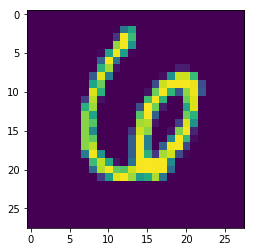

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])
plt.imshow(X_test[66])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
batch_size = 32

In [9]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1))
model.add(Activation('relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3))#9
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#7
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))
                                                                                                                                                                                                                                                   

model.add(Convolution2D(16, 3, 3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#3
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)       

In [0]:
from keras import backend as K

In [0]:
def custom_loss(actual,predicted):
    sqr_w = 0
    lamda = 0.01 #1e-4
    batch_size =128
    for layer in model.layers: ###N
              
       sqr_w += sqr_w + np.sum(np.sum(np.sum(np.square(layer.get_weights()))))

    l2_regularization = (lamda*sqr_w)/2*(batch_size)
    loss = K.categorical_crossentropy(actual,predicted) + l2_regularization

    # Return a function
    return loss
  

In [12]:
from keras.optimizers import Adam

model.compile(loss=custom_loss, optimizer=Adam(lr=0.01), metrics=['accuracy'])
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)


model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),validation_data=(X_test, Y_test), 
                    steps_per_epoch=len(X_train) / 32, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1875/1875 [==============================] - 48s 26ms/step - loss: 29360263168.0000 - acc: 0.8761 - val_loss: 29360263168.0000 - val_acc: 0.9811
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 29360263168.0000 - acc: 0.9217 - val_loss: 29360263168.0000 - val_acc: 0.9753
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 29360263168.0000 - acc: 0.9309 - val_loss: 29360263168.0000 - val_acc: 0.9864
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 29360263168.0000 - acc: 0.9349 - val_loss: 29360263168.0000 - val_acc: 0.9870
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 29360263168.0000 - acc: 0.9367 - val_loss: 29360263168.0000 - val_acc: 0.9905
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 29360263168.0000 - acc: 0.9394 - val_loss: 29360263168.0000 - val_acc: 0.9899
Epoch 7/10
1875/1875 [==============================] - 42s 23ms/step - los

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[29360263168.0, 0.9914]


In [0]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)

In [0]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(Y_test)):
    if(np.argmax(Y_test[i])==pred_digits[i]):
        prop_class.append(i)
    #if(len(prop_class)==8):
        #break

i=0
for i in range(len(Y_test)):
    if(not np.argmax(Y_test[i])==pred_digits[i]):
        mis_class.append(i)
    #if(len(mis_class)==8):
        #break

In [0]:
Y_test.shape

(10000, 10)

In [0]:
print(X_test.shape)

(10000, 28, 28, 1)


In [0]:
print(len(mis_class))

93


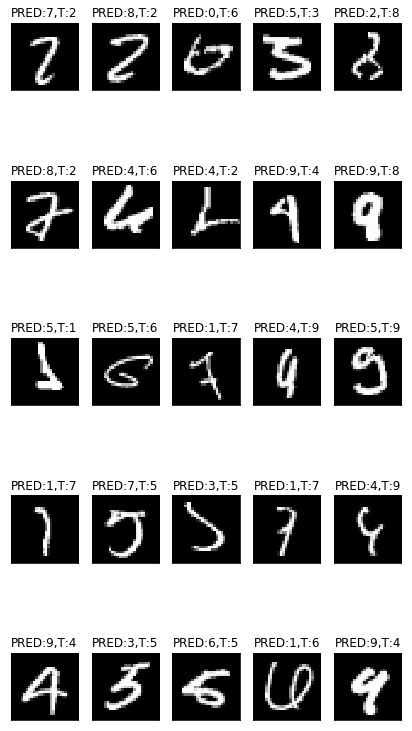

In [18]:

plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()


# plot 25 correct predictions
for i, incorrect in enumerate(mis_class[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "PRED:{},T:{}".format(pred_digits[incorrect],
                                        y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
